# **MACHINE LEARNING PREDICTION**

Overview :

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the
same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.


dataset :
1. Bank Train   
https://drive.google.com/file/d/18-wWnvO3feu2BNID7F6x1phOUwF-6z4z/view?usp=drive_link

2.  Bank Test

  https://drive.google.com/file/d/1dpg4l70SlqHhnXWy8r71-CN3Pq1YBPsm/view?usp=drive_link

## Data Preparation

In [289]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

In [290]:
df = pd.read_csv('/content/drive/MyDrive/tessss/bank-train.csv', delimiter=';')

In [291]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,0
39996,40096,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,1
39997,40097,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,1
39998,40098,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,0


# Data Cleaning

## Drop Irrelevant values

In [292]:
df1 = df.copy()
df1.drop(['day', 'month'],inplace=True,axis=1)

In [293]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  duration   40000 non-null  int64 
 11  campaign   40000 non-null  int64 
 12  pdays      40000 non-null  int64 
 13  previous   40000 non-null  int64 
 14  poutcome   40000 non-null  object
 15  y          40000 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.9+ MB


## check missing data

In [294]:
df1.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


## Check duplicate values

In [295]:
df1.duplicated().sum()

0

## check data composition (balance/imbalance of dataset)

In [296]:
for i in df1.columns:
  unique_data = df1[i].value_counts()
  print(unique_data,'\n')

id
100      1
26770    1
26763    1
26764    1
26765    1
        ..
13433    1
13434    1
13435    1
13436    1
40099    1
Name: count, Length: 40000, dtype: int64 

age
32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
90       1
94       1
86       1
95       1
81       1
Name: count, Length: 70, dtype: int64 

job
blue-collar      9383
management       8166
technician       6852
admin.           4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64 

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64 

education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64 

default
no     39191
yes      809
Name: count, dtype: int64 

balance
 0         3209
 1          179
 2          141
 4          126
 3          124
           ... 
-5

drop the **default** columns because the data show 98 : 2 between no and yes values

drop **poutcome** column (there is >80% of unknown value) and **contact** column (there is >30% unknown value)

In [297]:
df1.drop(['default','poutcome','contact'],inplace=True,axis=1)
df1

,id,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y
0,100,58,management,married,tertiary,2143,yes,no,261,1,-1,0,0
1,101,44,technician,single,secondary,29,yes,no,151,1,-1,0,0
2,102,33,entrepreneur,married,secondary,2,yes,yes,76,1,-1,0,0
3,103,47,blue-collar,married,unknown,1506,yes,no,92,1,-1,0,0
4,104,33,unknown,single,unknown,1,no,no,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,395,no,no,107,1,-1,0,0
39996,40096,30,management,single,tertiary,3340,no,no,238,3,-1,0,1
39997,40097,54,admin.,divorced,secondary,200,no,no,170,1,-1,0,1
39998,40098,34,management,married,tertiary,1047,no,no,342,1,90,7,0


## Data Manipulation

In [298]:
dfm = df1.copy()

In [299]:
dfm

,id,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y
0,100,58,management,married,tertiary,2143,yes,no,261,1,-1,0,0
1,101,44,technician,single,secondary,29,yes,no,151,1,-1,0,0
2,102,33,entrepreneur,married,secondary,2,yes,yes,76,1,-1,0,0
3,103,47,blue-collar,married,unknown,1506,yes,no,92,1,-1,0,0
4,104,33,unknown,single,unknown,1,no,no,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,395,no,no,107,1,-1,0,0
39996,40096,30,management,single,tertiary,3340,no,no,238,3,-1,0,1
39997,40097,54,admin.,divorced,secondary,200,no,no,170,1,-1,0,1
39998,40098,34,management,married,tertiary,1047,no,no,342,1,90,7,0


In [300]:
for i in dfm.columns:
  unique_data2 = dfm[i].value_counts()
  print(unique_data2,'\n')

id
100      1
26770    1
26763    1
26764    1
26765    1
        ..
13433    1
13434    1
13435    1
13436    1
40099    1
Name: count, Length: 40000, dtype: int64 

age
32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
90       1
94       1
86       1
95       1
81       1
Name: count, Length: 70, dtype: int64 

job
blue-collar      9383
management       8166
technician       6852
admin.           4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64 

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64 

education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64 

balance
 0         3209
 1          179
 2          141
 4          126
 3          124
           ... 
-544          1
 4749         1
 21111        1
 4965         1


drop unknown values because it just similar with null value. leaving them there will negatively affect our analysis

In [301]:
 dfm = dfm[dfm['education']!='unknown']
 dfm = dfm[dfm['job']!='unknown']
 dfm

,id,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y
0,100,58,management,married,tertiary,2143,yes,no,261,1,-1,0,0
1,101,44,technician,single,secondary,29,yes,no,151,1,-1,0,0
2,102,33,entrepreneur,married,secondary,2,yes,yes,76,1,-1,0,0
5,105,35,management,married,tertiary,231,yes,no,139,1,-1,0,0
6,106,28,management,single,tertiary,447,yes,yes,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,40095,53,technician,married,tertiary,395,no,no,107,1,-1,0,0
39996,40096,30,management,single,tertiary,3340,no,no,238,3,-1,0,1
39997,40097,54,admin.,divorced,secondary,200,no,no,170,1,-1,0,1
39998,40098,34,management,married,tertiary,1047,no,no,342,1,90,7,0


In [302]:
dfm['job'] = dfm['job'].astype('string')

In [303]:
dfm.loc[dfm['job']=='technician','job']= 'blue-collar'
dfm.loc[dfm['job']=='admin.','job']= 'services'
dfm.loc[dfm['job']=='self-employed','job']= 'entrepreneur'
dfm.loc[dfm['job']=='housemaid','job']= 'others'
dfm.loc[dfm['job']=='student','job']= 'others'
dfm.loc[dfm['job']=='unemployed','job']= 'others'

In [304]:
dfm.loc[dfm['age'] > 40, 'generation'] = 'Gen-X'
dfm.loc[dfm['age'].between(25,40), 'generation'] = 'Gen-Y'
dfm.loc[dfm['age'] <= 24, 'generation'] = 'Gen-Z'

convert -1 in pdays to 0

In [305]:
dfm.loc[dfm['pdays']== -1,'pdays']= 0

convert divorced into single

In [306]:
dfm.loc[dfm['marital']== 'divorced','marital']= "single"

I consider people who most likely subscribe the deposit are who have extra money than he needed to survive in portugal. therefore i define 100 annual balance as threshold to determine which people are broke and not.the link below is the source where i found single people needed 2500 euro in order to survive or around 83 annual balance.


https://portugalbuyersagent.com/cost-of-living-in-portugal/

In [307]:
dfm.loc[dfm['balance']>83 , 'status'] = 'broke'
dfm.loc[dfm['balance']<=83, 'status'] = 'not broke'

In [308]:
for i in dfm.columns:
  unique_data3 = dfm[i].value_counts()
  print(unique_data3,'\n')

id
100      1
26834    1
26836    1
26837    1
26838    1
        ..
13639    1
13640    1
13641    1
13642    1
40099    1
Name: count, Length: 38338, dtype: int64 

age
32    1874
31    1785
33    1737
34    1692
35    1666
      ... 
90       1
94       1
86       1
95       1
81       1
Name: count, Length: 70, dtype: int64 

job
blue-collar     15582
services         8110
management       7977
entrepreneur     2714
others           2577
retired          1378
Name: count, dtype: Int64 

marital
married    23310
single     15028
Name: count, dtype: int64 

education
secondary    20933
tertiary     11180
primary       6225
Name: count, dtype: int64 

balance
 0         3072
 1          176
 2          136
 4          122
 3          118
           ... 
 5003         1
-832          1
 4043         1
 6812         1
 102127       1
Name: count, Length: 6685, dtype: int64 

housing
yes    23229
no     15109
Name: count, dtype: int64 

loan
no     31539
yes     6799
Name: count, dtype: 

## Resample Data

In [309]:
dfp = dfm.copy()
dfp.set_index('id')



,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y,generation,status
id,,,,,,,,,,,,,,
100,58,management,married,tertiary,2143,yes,no,261,1,0,0,0,Gen-X,broke
101,44,blue-collar,single,secondary,29,yes,no,151,1,0,0,0,Gen-X,not broke
102,33,entrepreneur,married,secondary,2,yes,yes,76,1,0,0,0,Gen-Y,not broke
105,35,management,married,tertiary,231,yes,no,139,1,0,0,0,Gen-Y,broke
106,28,management,single,tertiary,447,yes,yes,217,1,0,0,0,Gen-Y,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40095,53,blue-collar,married,tertiary,395,no,no,107,1,0,0,0,Gen-X,broke
40096,30,management,single,tertiary,3340,no,no,238,3,0,0,1,Gen-Y,broke
40097,54,services,single,secondary,200,no,no,170,1,0,0,1,Gen-X,broke


In [310]:
viz = [
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'pdays',
 'previous',
 'y',
 'generation',
 'status']

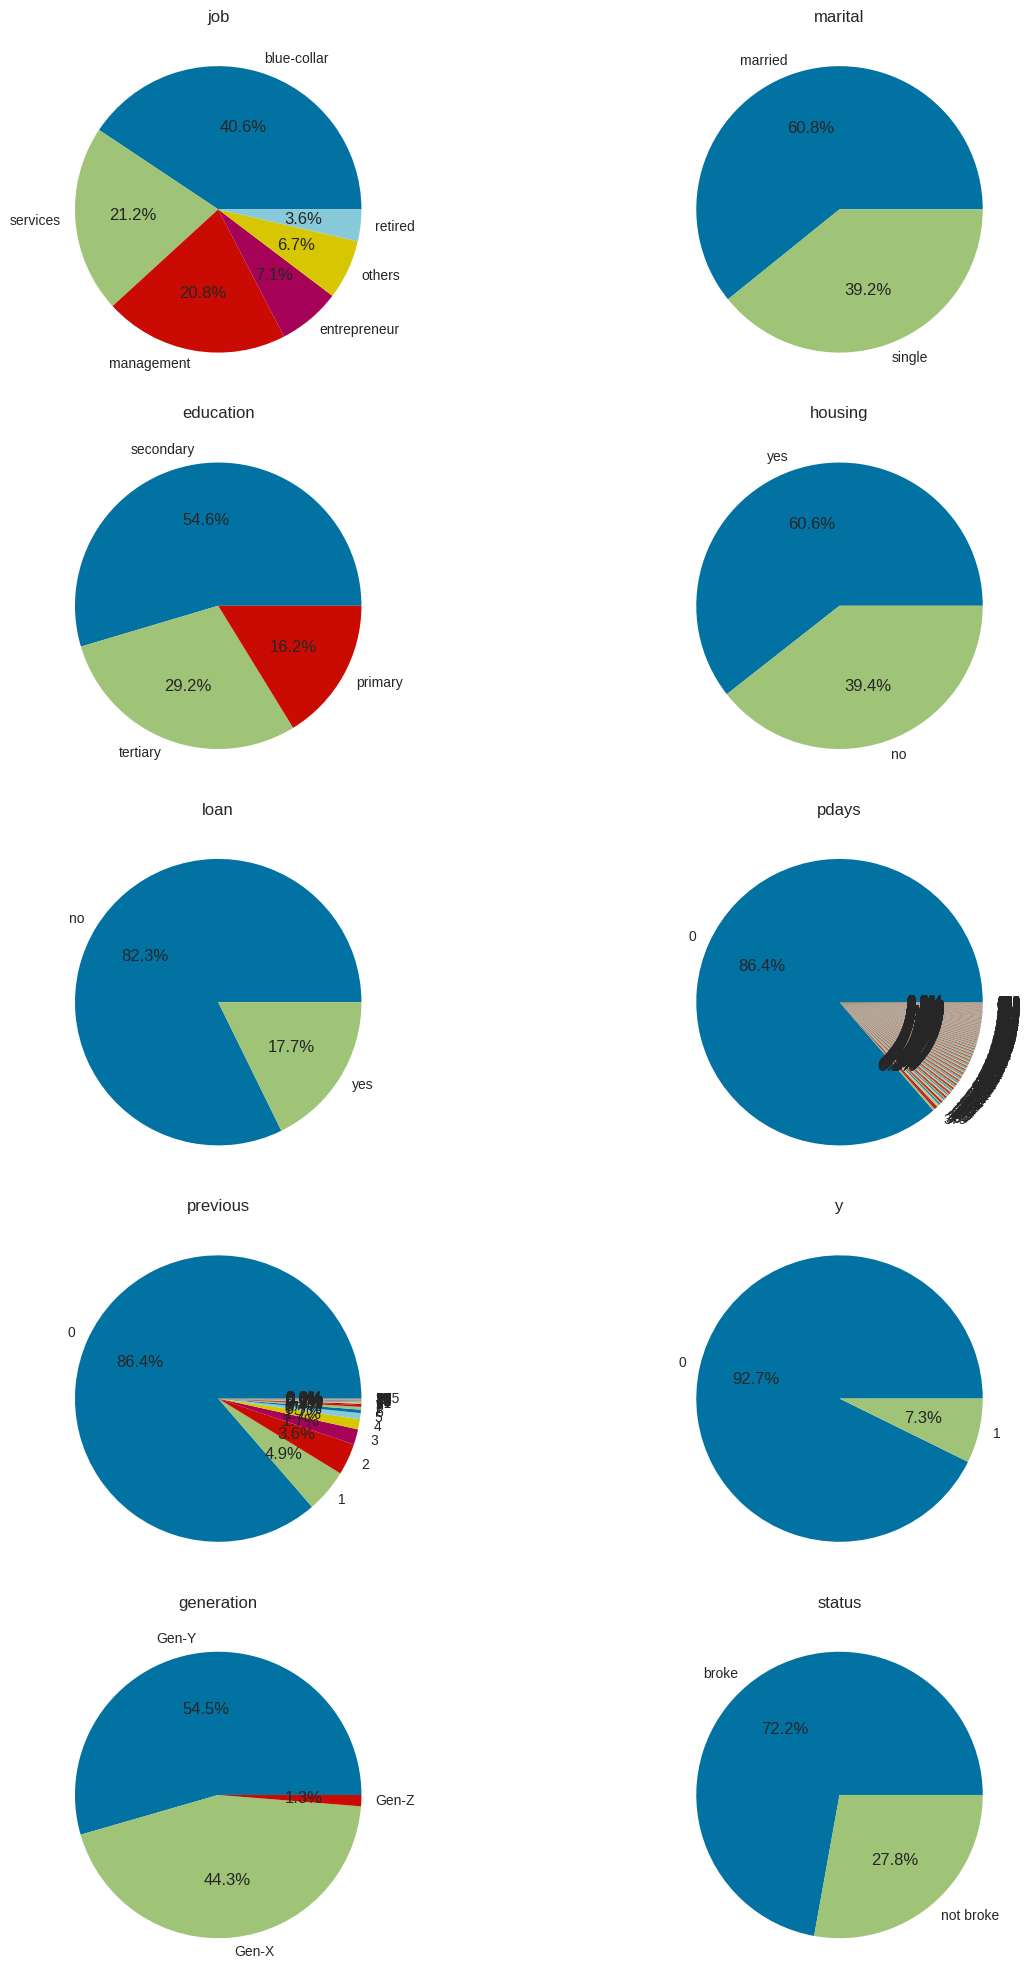

In [311]:

fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust figsize as needed

axes = axes.ravel()  # Flatten the axes array for easier iteration

# only for visualization
for i, col in enumerate(dfp[viz]):
    dfp[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', title=col)
    axes[i].set_ylabel('')  # Remove y-axis labels

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


,id,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y,generation,status
21006,21106,54,management,married,tertiary,0,no,no,260,7,0,0,0,Gen-X,not broke
26410,26510,30,services,married,primary,1015,yes,no,24,1,113,8,0,Gen-Y,broke
16031,16131,30,management,single,tertiary,77,no,no,267,1,0,0,0,Gen-Y,not broke
13641,13741,53,management,married,primary,-139,no,no,328,3,0,0,0,Gen-X,not broke
35301,35401,25,others,single,secondary,520,yes,no,236,1,0,0,0,Gen-Y,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,40086,29,management,single,tertiary,637,yes,no,340,1,119,1,1,Gen-Y,broke
39988,40088,55,management,single,tertiary,2383,no,no,591,2,0,0,1,Gen-X,broke
39990,40090,26,blue-collar,single,secondary,1231,yes,no,385,2,96,5,1,Gen-Y,broke
39996,40096,30,management,single,tertiary,3340,no,no,238,3,0,0,1,Gen-Y,broke


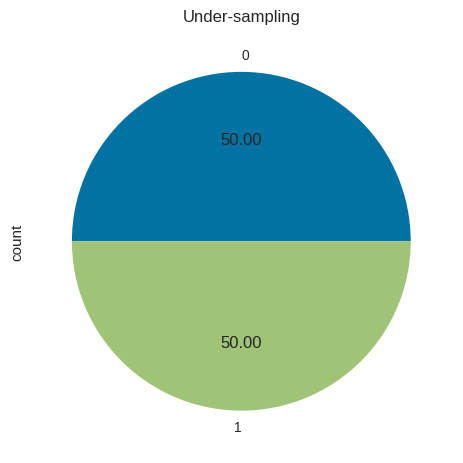

In [312]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
dfp, y_res = rus.fit_resample(dfp,dfp['y'])

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
dfp

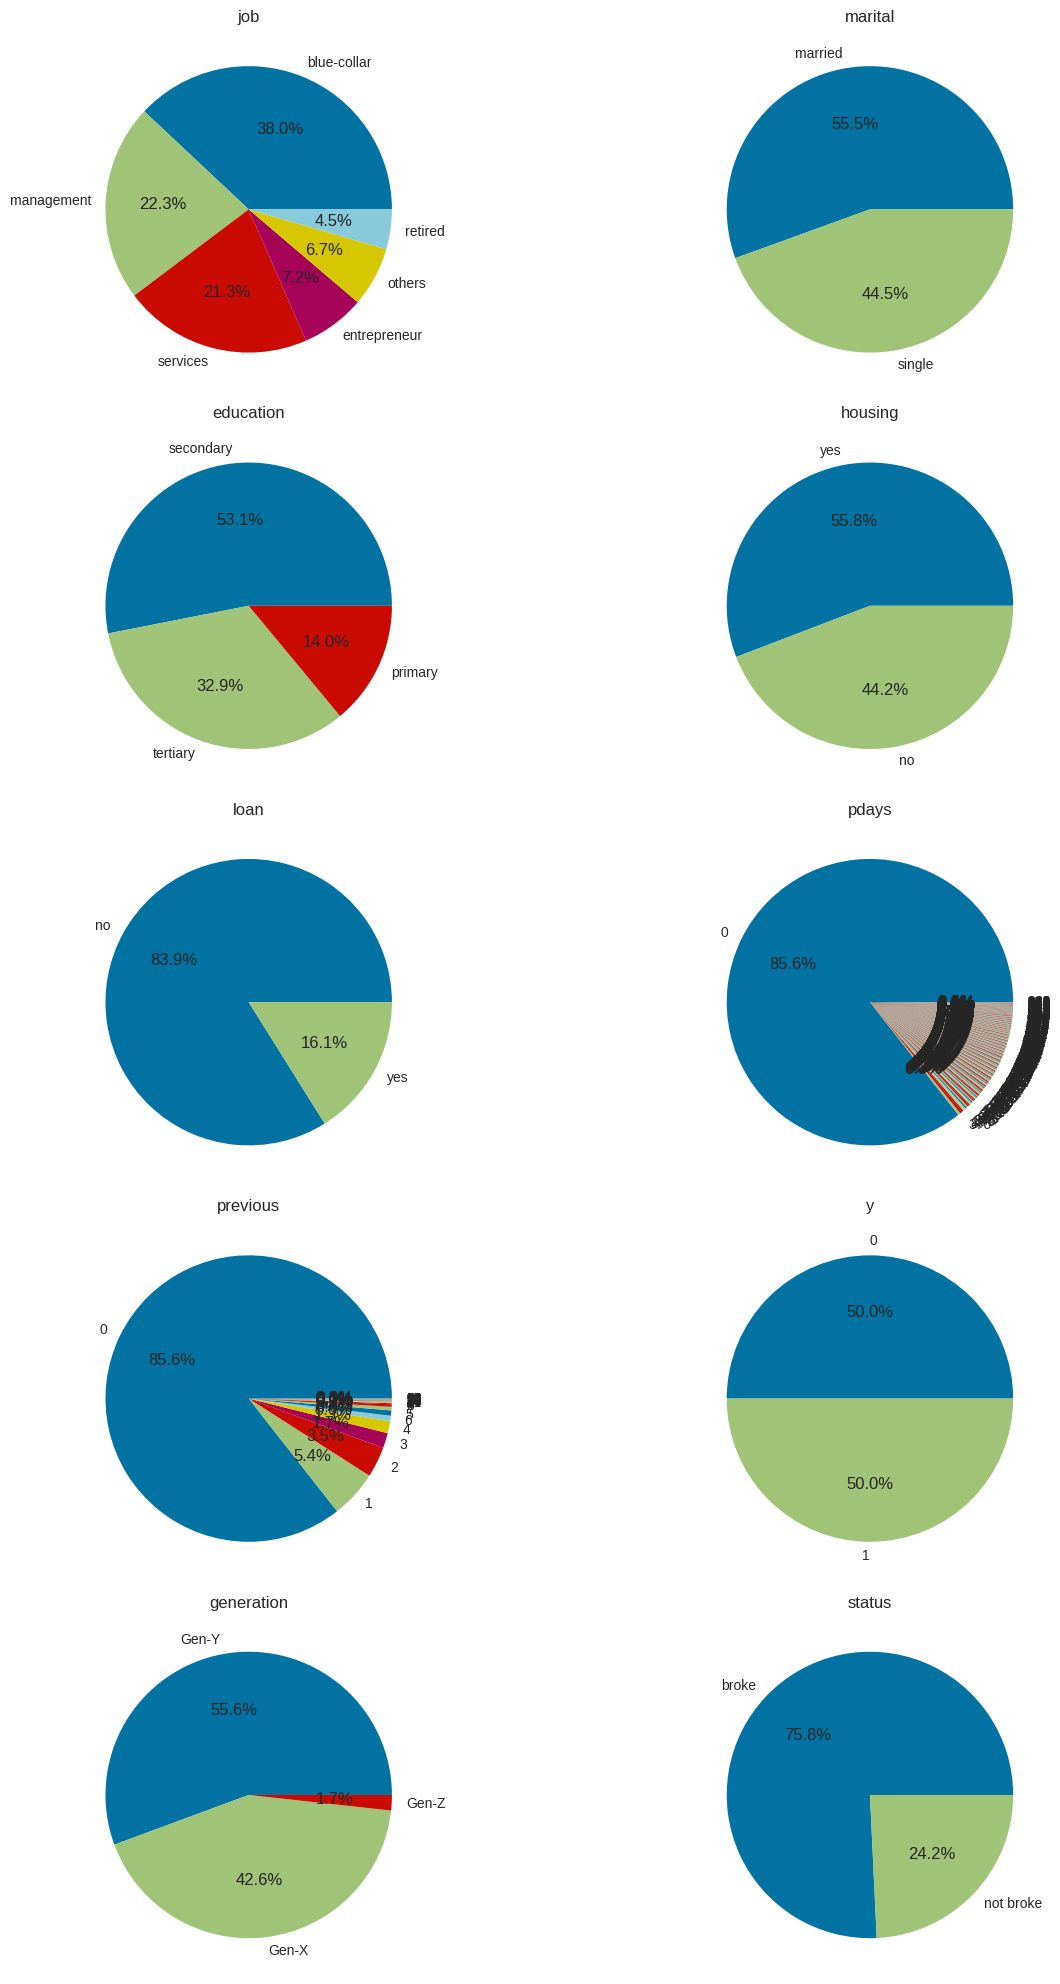

In [313]:

fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust figsize as needed

axes = axes.ravel()  # Flatten the axes array for easier iteration

for i, col in enumerate(dfp[viz]):
    dfp[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', title=col)
    axes[i].set_ylabel('')  # Remove y-axis labels

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


## Handling outliers

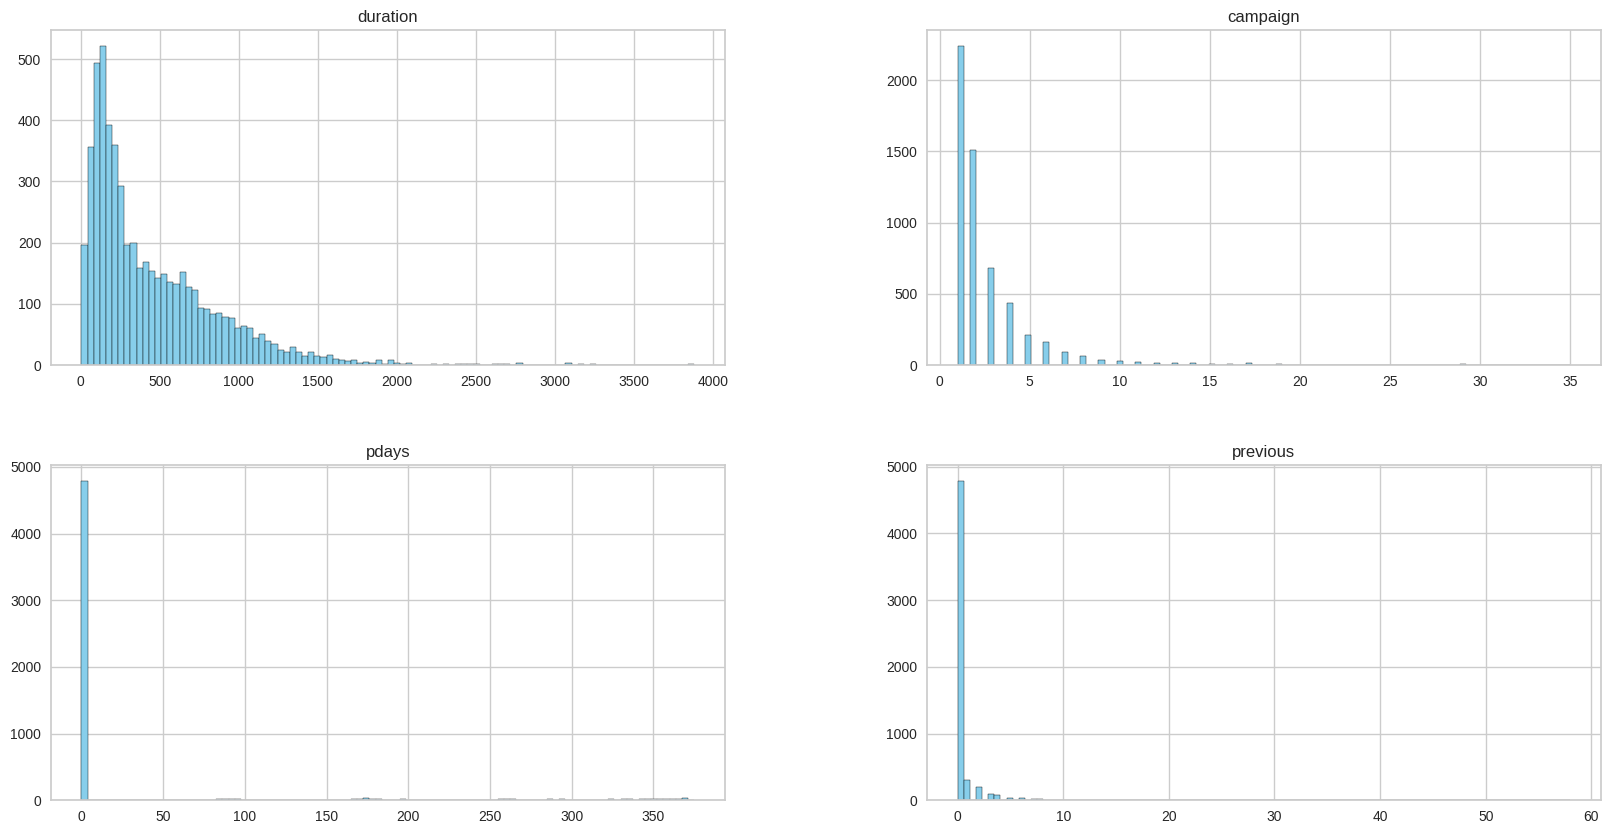

In [314]:
numerical = ['duration','campaign','pdays','previous']

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
for i,el in enumerate(numerical):
    a = dfp.hist(el, ax=axes.flatten()[i],grid=True,bins =100,color='skyblue', edgecolor='black')
plt.show()

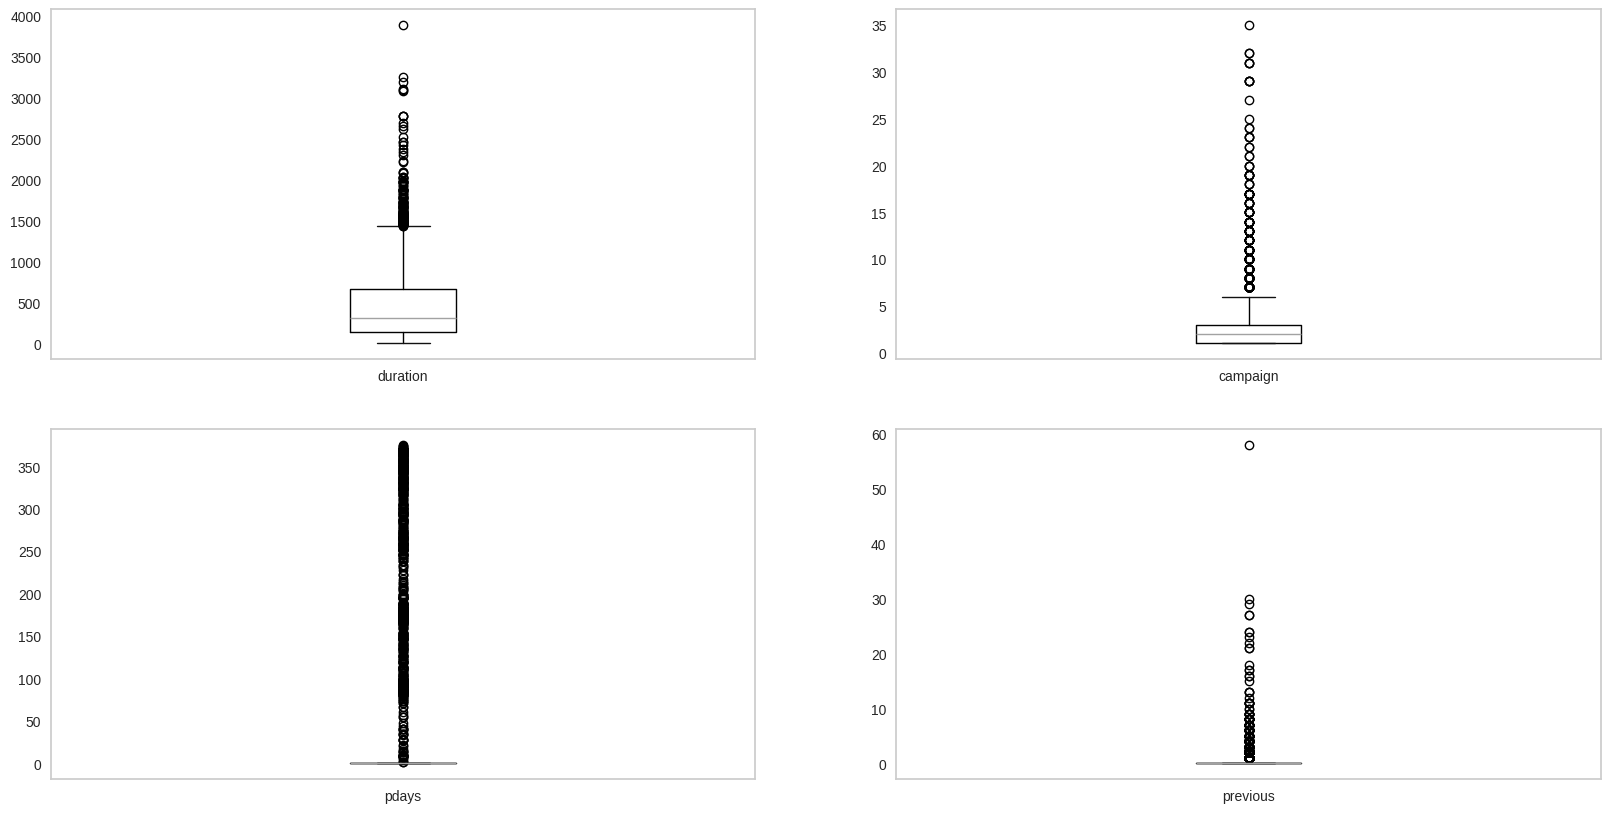

In [315]:

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
for nomor, kolom in enumerate(numerical):
  dfp.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

In [316]:
Q1 = dfp[numerical].quantile(0.25)
Q3 = dfp[numerical].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 duration    147.0
campaign      1.0
pdays         0.0
previous      0.0
Name: 0.25, dtype: float64

Q3:
 duration    661.0
campaign      3.0
pdays         0.0
previous      0.0
Name: 0.75, dtype: float64

IQR:
 duration    514.0
campaign      2.0
pdays         0.0
previous      0.0
dtype: float64

Min:
 duration   -624.0
campaign     -2.0
pdays         0.0
previous      0.0
dtype: float64

Max:
 duration    1432.0
campaign       6.0
pdays          0.0
previous       0.0
dtype: float64


In [317]:
boxplot_min

,0
duration,-624.0
campaign,-2.0
pdays,0.0
previous,0.0


In [318]:
filter_min = dfp[numerical] < boxplot_min
filter_max = dfp[numerical] > boxplot_max

# Correctly apply the filter to the entire DataFrame
df_non_outlier = dfp[~(filter_min | filter_max).any(axis=1)]

df_non_outlier

,id,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y,generation,status
16031,16131,30,management,single,tertiary,77,no,no,267,1,0,0,0,Gen-Y,not broke
13641,13741,53,management,married,primary,-139,no,no,328,3,0,0,0,Gen-X,not broke
35301,35401,25,others,single,secondary,520,yes,no,236,1,0,0,0,Gen-Y,broke
19199,19299,44,blue-collar,married,secondary,3444,no,no,212,3,0,0,0,Gen-X,broke
37033,37133,58,blue-collar,married,secondary,602,yes,no,201,1,0,0,0,Gen-X,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39982,40082,25,others,single,tertiary,1189,no,no,165,1,0,0,1,Gen-Y,broke
39984,40084,45,services,married,secondary,204,yes,no,224,2,0,0,1,Gen-X,broke
39988,40088,55,management,single,tertiary,2383,no,no,591,2,0,0,1,Gen-X,broke
39996,40096,30,management,single,tertiary,3340,no,no,238,3,0,0,1,Gen-Y,broke


In [319]:
df_non_outlier.max()

<ipython-input-319-7da9165a8cca>:1: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  df_non_outlier.max()


,0
id,40097
age,94
job,services
marital,single
education,tertiary
balance,45141
housing,yes
loan,yes
duration,1431
campaign,6


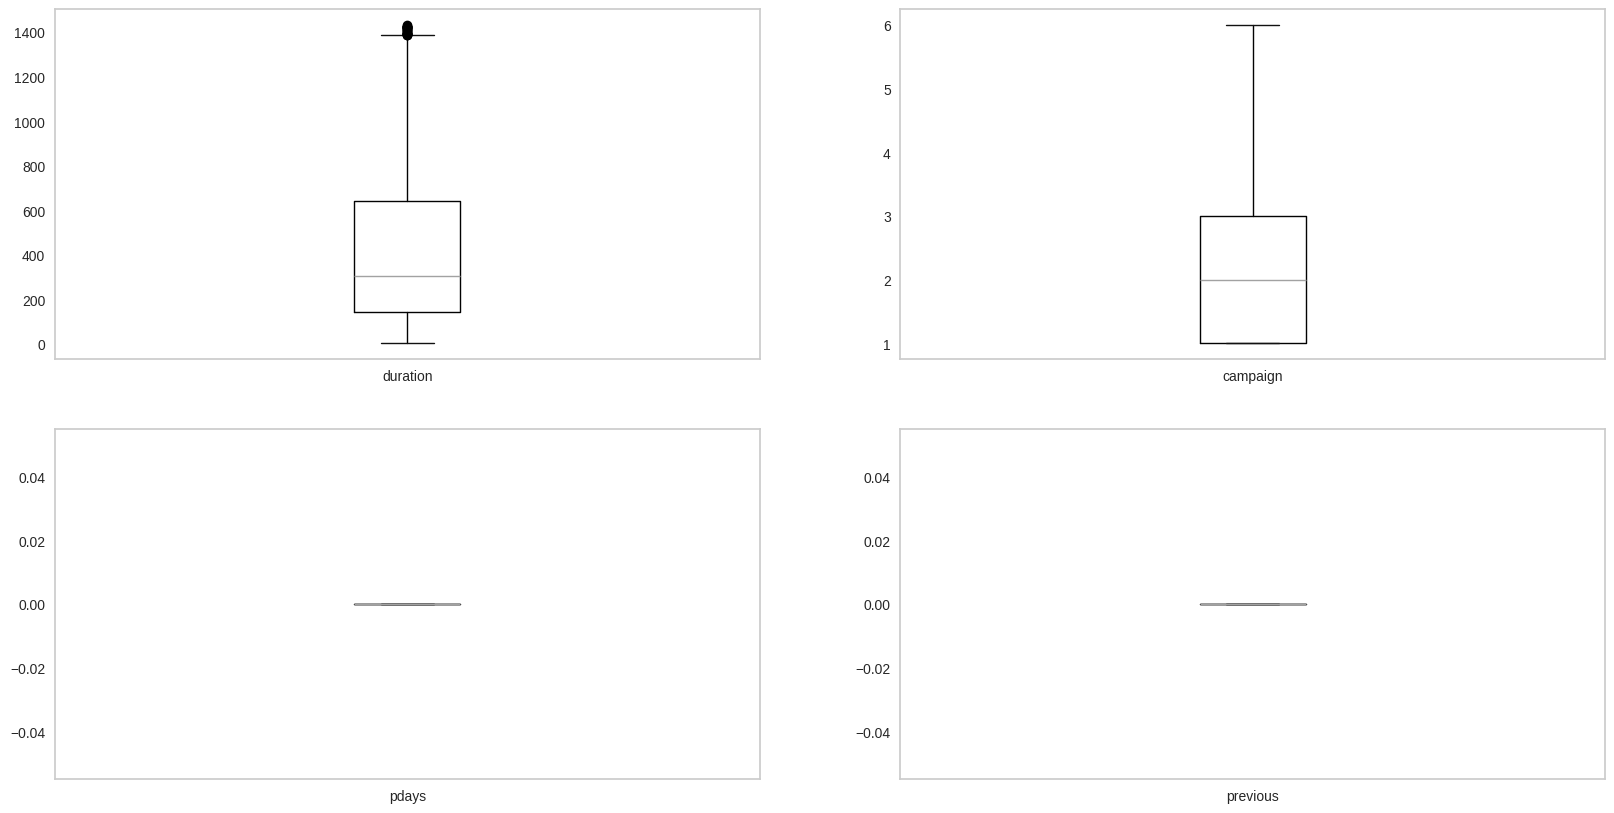

In [320]:
#check boxplot after remove outliers
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
for nomor, kolom in enumerate(numerical):
  df_non_outlier.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

from graphic above I prefer to remove outlier by dropping value higher than 99 percentile. zero values across all data stopping me to remove percentile 1 and zero values also make me not transform the data eventhough the graphics show skew data.

# Analysis


Prepare numerical and categorical data

In [321]:
dfc = df_non_outlier.copy()

In [322]:
numerical = ['duration','balance','campaign','pdays','previous','y','age']
categorical = ['job','marital','education','housing','loan','generation', 'status']
all_columns = numerical + categorical  # Combine for all columns
dfc = dfc[all_columns]  # Select desired columns

In [323]:
dfc

,duration,balance,campaign,pdays,previous,y,age,job,marital,education,housing,loan,generation,status
16031,267,77,1,0,0,0,30,management,single,tertiary,no,no,Gen-Y,not broke
13641,328,-139,3,0,0,0,53,management,married,primary,no,no,Gen-X,not broke
35301,236,520,1,0,0,0,25,others,single,secondary,yes,no,Gen-Y,broke
19199,212,3444,3,0,0,0,44,blue-collar,married,secondary,no,no,Gen-X,broke
37033,201,602,1,0,0,0,58,blue-collar,married,secondary,yes,no,Gen-X,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39982,165,1189,1,0,0,1,25,others,single,tertiary,no,no,Gen-Y,broke
39984,224,204,2,0,0,1,45,services,married,secondary,yes,no,Gen-X,broke
39988,591,2383,2,0,0,1,55,management,single,tertiary,no,no,Gen-X,broke
39996,238,3340,3,0,0,1,30,management,single,tertiary,no,no,Gen-Y,broke


In [324]:
dfr = dfc.copy()

#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
dfr[numerical] = scaler.fit_transform(dfr[numerical])

#create dummy for categorical data
dfr = pd.get_dummies(dfr, columns=categorical)

dfr

,duration,balance,campaign,pdays,previous,y,age,job_blue-collar,job_entrepreneur,job_management,...,education_tertiary,housing_no,housing_yes,loan_no,loan_yes,generation_Gen-X,generation_Gen-Y,generation_Gen-Z,status_broke,status_not broke
16031,0.184303,0.065043,0.0,0.0,0.0,0.0,0.146667,False,False,True,...,True,True,False,True,False,False,True,False,False,True
13641,0.227050,0.060561,0.4,0.0,0.0,0.0,0.453333,False,False,True,...,False,True,False,True,False,True,False,False,False,True
35301,0.162579,0.074234,0.0,0.0,0.0,0.0,0.080000,False,False,False,...,False,False,True,True,False,False,True,False,True,False
19199,0.145760,0.134899,0.4,0.0,0.0,0.0,0.333333,True,False,False,...,False,True,False,True,False,True,False,False,True,False
37033,0.138052,0.075935,0.0,0.0,0.0,0.0,0.520000,True,False,False,...,False,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39982,0.112824,0.088114,0.0,0.0,0.0,1.0,0.080000,False,False,False,...,True,True,False,True,False,False,True,False,True,False
39984,0.154170,0.067678,0.2,0.0,0.0,1.0,0.346667,False,False,False,...,False,False,True,True,False,True,False,False,True,False
39988,0.411352,0.112886,0.2,0.0,0.0,1.0,0.480000,False,False,True,...,True,True,False,True,False,True,False,False,True,False
39996,0.163980,0.132741,0.4,0.0,0.0,1.0,0.146667,False,False,True,...,True,True,False,True,False,False,True,False,True,False


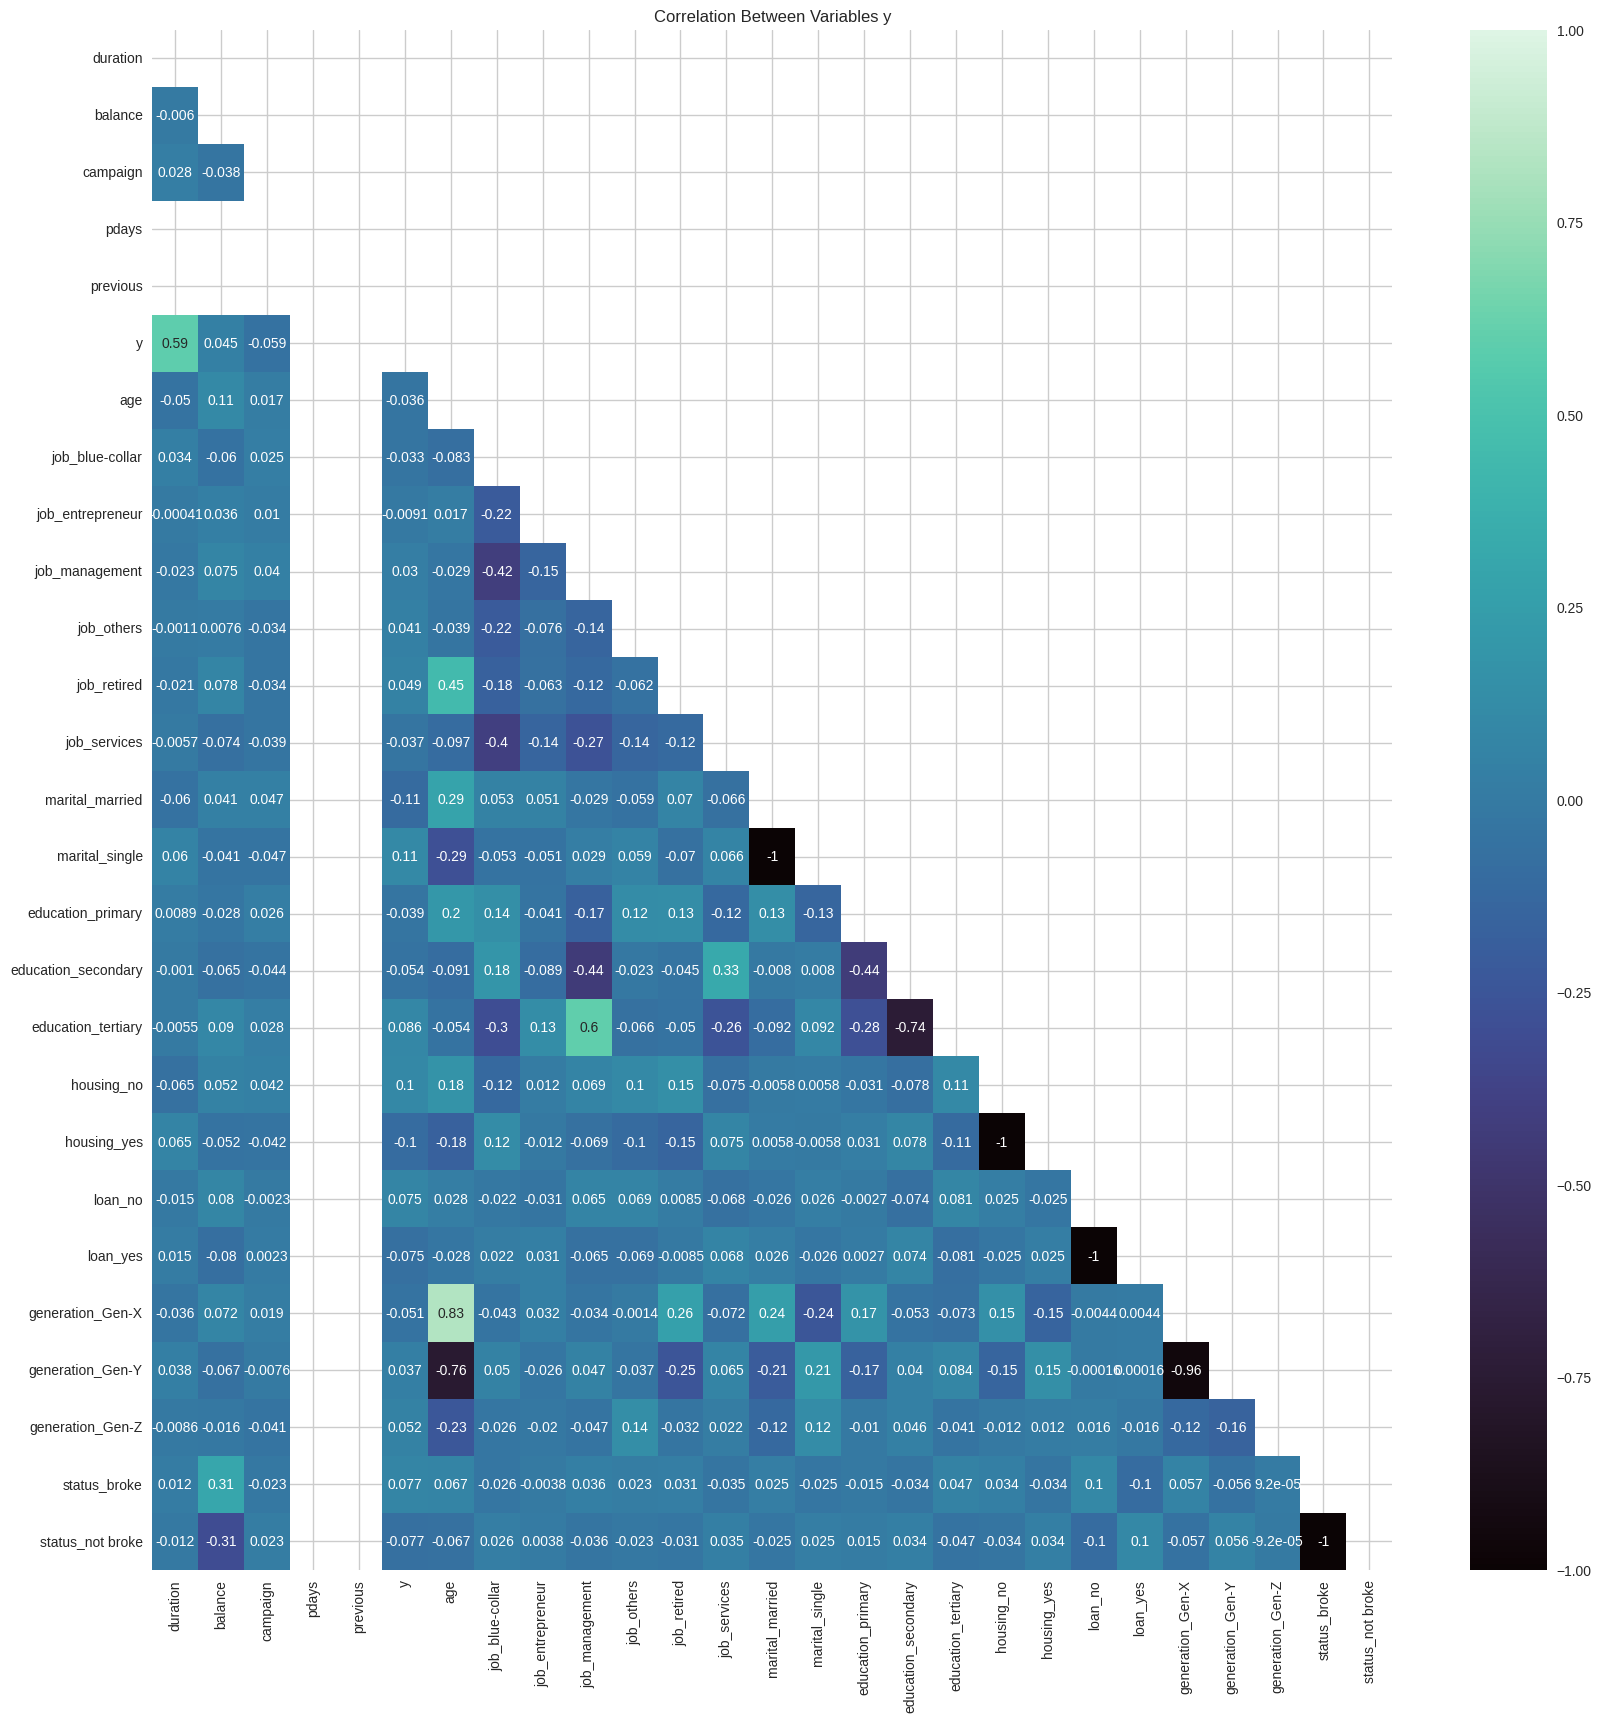

In [325]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables y')

mask = np.triu(np.ones_like(
    dfr.corr(), dtype=bool))
sns.heatmap(dfr.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()




In [326]:
 dfr.corr()['y'].sort_values()

,y
marital_married,-0.108023
housing_yes,-0.100806
status_not broke,-0.077134
loan_yes,-0.075412
campaign,-0.058590
education_secondary,-0.053951
generation_Gen-X,-0.051246
education_primary,-0.038613
job_services,-0.036623
age,-0.036096


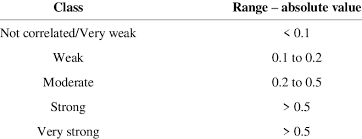

I only take variable with correlation cofficient higher than 0.1

before do regression I checked correlation between independents and dependent variable. the result is **duration, marital_single, marital_married** are variable I took for regression.

## check multicollinearity

In [327]:
df_final = dfr[['duration','marital_single','marital_married','housing_no','housing_yes']]

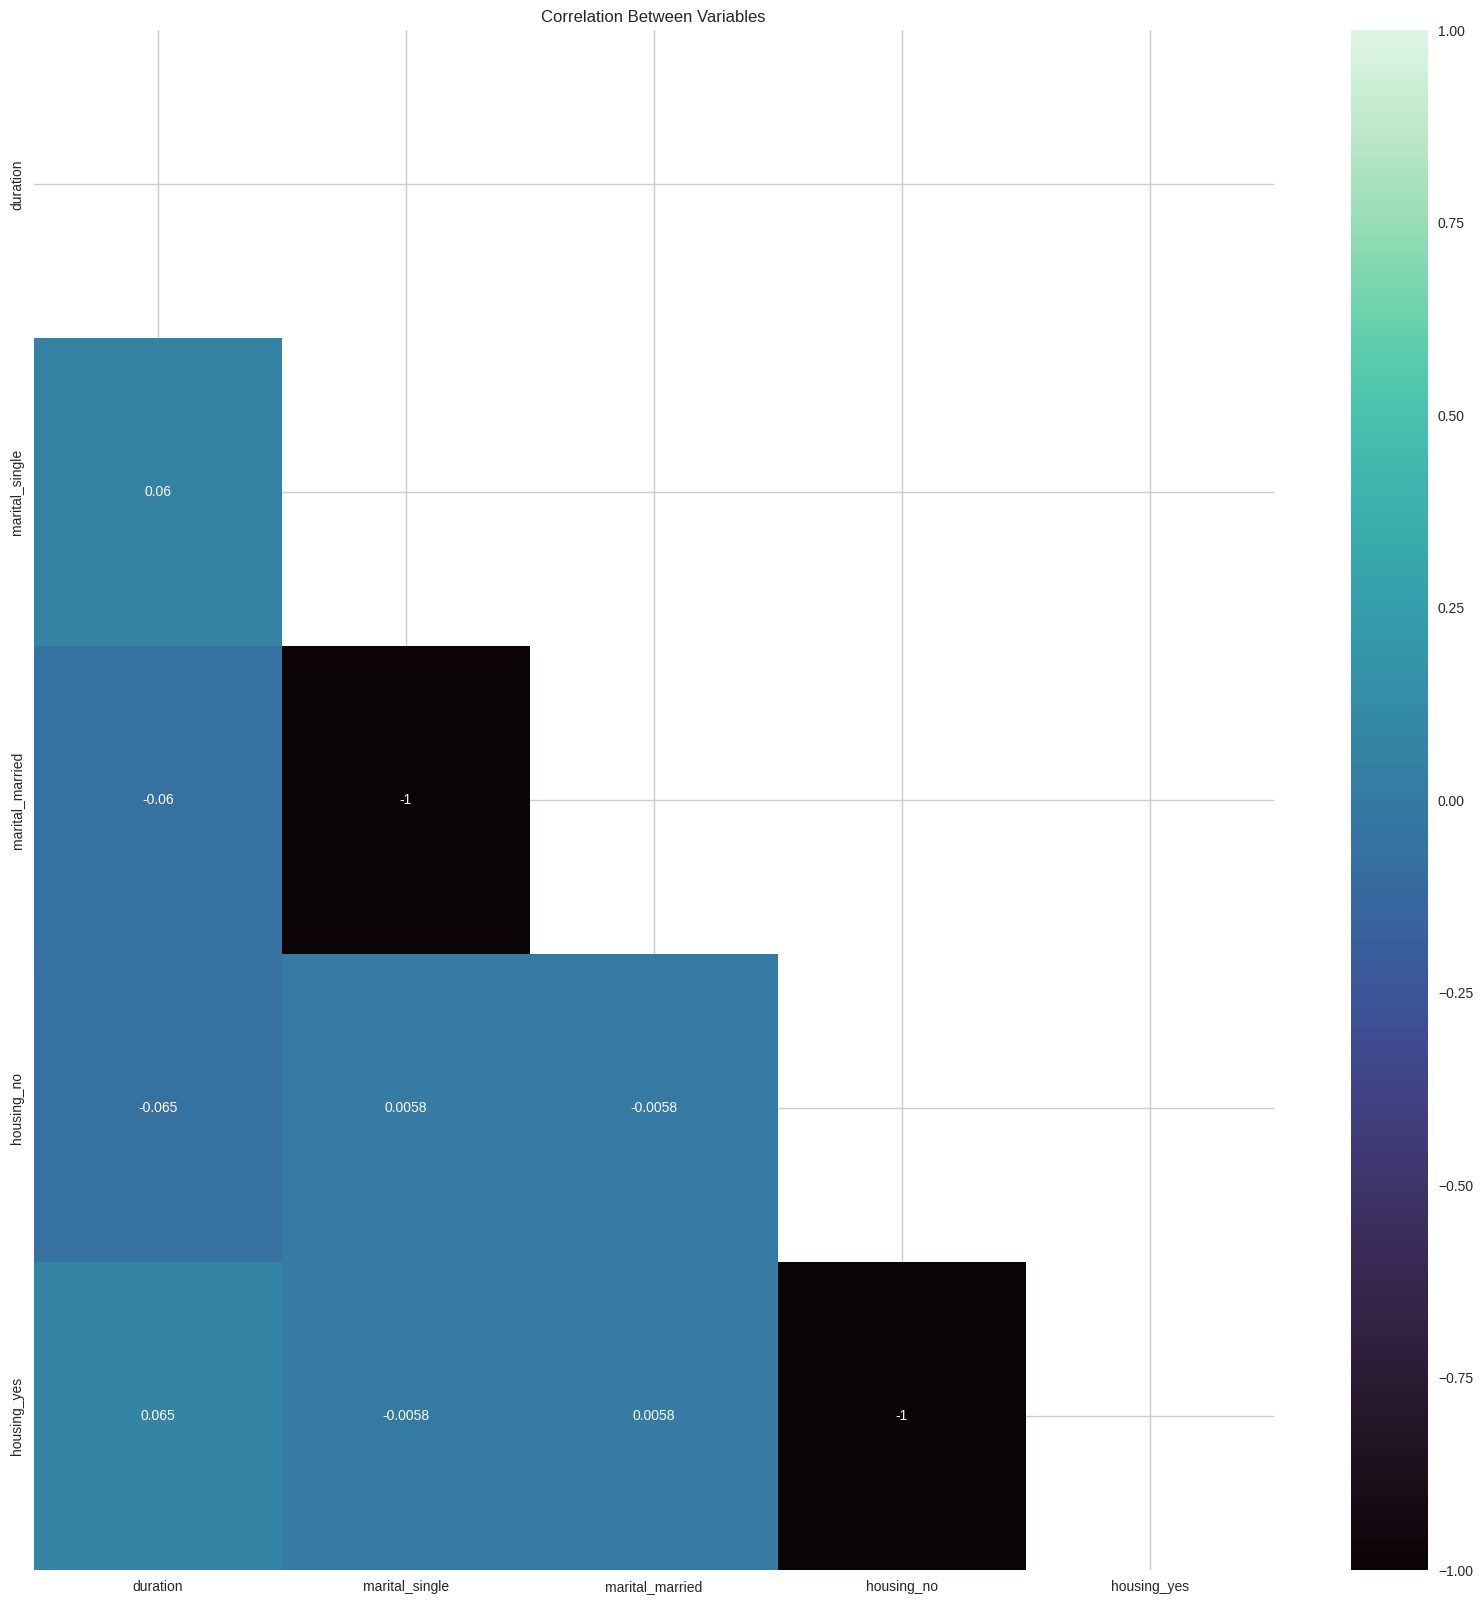

In [328]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables')

mask = np.triu(np.ones_like(
    df_final.corr(), dtype=bool))
sns.heatmap(df_final.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [329]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['marital_married', 'housing_yes']

In [330]:
df_grand_final = list(set(df_final)-set(to_drop))
df_grand_final

['marital_single', 'housing_no', 'duration']

In [331]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = dfr[df_grand_final]
y = dfr[['y']]



In [332]:
# Fit logistic regression model to the training data
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [333]:
# Accuracy dr prediksi model dengan data training
model.score(x, y)

0.7973160573808422

## Confussion matrix

In [334]:
# confusion_matrix(subscrive actual, subscribe prediksi)
confusion_matrix(y, model.predict(x))

array([[1884,  332],
       [ 544, 1562]])

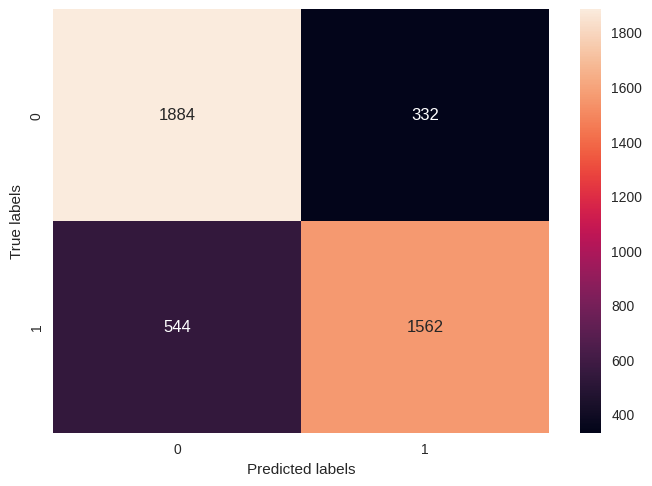

In [335]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [336]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(x), target_names=['Subscribe','Not Subscribe']))

               precision    recall  f1-score   support

    Subscribe       0.78      0.85      0.81      2216
Not Subscribe       0.82      0.74      0.78      2106

     accuracy                           0.80      4322
    macro avg       0.80      0.80      0.80      4322
 weighted avg       0.80      0.80      0.80      4322



## check model on test data

In [337]:
test= pd.read_csv('/content/drive/MyDrive/tessss/bank-test.csv', delimiter=';')

In [338]:
test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40100,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,40101,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,40102,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,40103,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,40104,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45306,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
5207,45307,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
5208,45308,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
5209,45309,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [339]:
coll = test.columns.to_list()


test = test[coll].set_index('id')

In [340]:
angka = ['duration']
huruf = ['marital','housing']

semua = angka+huruf
test = test[semua]

In [341]:

#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
test[angka] = scaler.fit_transform(test[angka])

#create dummy for categorical data
test = pd.get_dummies(test, columns=huruf)

In [342]:
test2= test[df_grand_final]

In [343]:
# Apply the model to the new data
test2['predicted_probability'] = model.predict_proba(test2)[:,1]

# Classify based on a threshold (e.g., 0.5)
test2['classification'] = (test2['predicted_probability'] >= 0.5).astype(int)

# 'test2' now has a new column 'classification' with values 0 or 1

<ipython-input-343-b71db7ee6fbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predicted_probability'] = model.predict_proba(test2)[:,1]
<ipython-input-343-b71db7ee6fbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['classification'] = (test2['predicted_probability'] >= 0.5).astype(int)


In [344]:
test2

,marital_single,housing_no,duration,predicted_probability,classification
id,,,,,
40100,False,True,0.044662,0.183805,0
40101,False,True,0.019292,0.155660,0
40102,True,False,0.016913,0.102532,0
40103,False,True,0.039641,0.177938,0
40104,True,True,0.071882,0.303499,0
...,...,...,...,...,...
45306,False,True,0.257928,0.547692,1
45307,False,True,0.120243,0.290154,0
45308,False,True,0.297569,0.623402,1


In [345]:
test2['classification'].value_counts()

,count
classification,
0,5043
1,168


-

**on this dataset I consider regression those who has value higher than 0.5 are the most likely buy subscription in the bank.**


-

## Conclusion


- from 5211 customers on test dataset only 168 person that will buy subscription on portuguese bank.

- so, I  recommend that the bank offer cashback, bonuses, or other rewards to the 168 people (3% of the total users) to encourage them to deposit in this bank.